In [48]:
def count_para(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [69]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
#import cv2
import nibabel as nib
from PIL import Image

In [70]:
from model.concave_dps_w import ResUNet as resu
import torch

In [72]:
model = resu(3,4)

In [73]:
resunet_dict.keys()

odict_keys(['resnet.inc.conv.0.weight', 'resnet.inc.conv.0.bias', 'resnet.inc.conv.1.weight', 'resnet.inc.conv.1.bias', 'resnet.inc.conv.1.running_mean', 'resnet.inc.conv.1.running_var', 'resnet.inc.conv.1.num_batches_tracked', 'resnet.inc.conv.3.weight', 'resnet.inc.conv.3.bias', 'resnet.dbconv1.conv1.conv.0.weight', 'resnet.dbconv1.conv1.conv.0.bias', 'resnet.dbconv1.conv1.conv.0.running_mean', 'resnet.dbconv1.conv1.conv.0.running_var', 'resnet.dbconv1.conv1.conv.0.num_batches_tracked', 'resnet.dbconv1.conv1.conv.2.weight', 'resnet.dbconv1.conv1.conv.2.bias', 'resnet.dbconv1.conv1.conv.3.weight', 'resnet.dbconv1.conv1.conv.3.bias', 'resnet.dbconv1.conv1.conv.3.running_mean', 'resnet.dbconv1.conv1.conv.3.running_var', 'resnet.dbconv1.conv1.conv.3.num_batches_tracked', 'resnet.dbconv1.conv1.conv.5.weight', 'resnet.dbconv1.conv1.conv.5.bias', 'resnet.dbconv1.bridge.conv.0.weight', 'resnet.dbconv1.bridge.conv.0.bias', 'resnet.dbconv1.bridge.conv.0.running_mean', 'resnet.dbconv1.bridge.co

In [20]:
ls


 Volume in drive C is OS
 Volume Serial Number is 200B-44ED

 Directory of C:\Users\Fenglei Fan\Dropbox\interpretability\Interpretability_code\Figure

09/25/2020  03:49 PM    <DIR>          .
09/25/2020  03:49 PM    <DIR>          ..
09/25/2020  03:47 PM    <DIR>          .ipynb_checkpoints
09/25/2020  03:49 PM           664,084 main.ipynb
09/22/2020  03:29 PM    <DIR>          model
09/22/2020  03:29 PM    <DIR>          PIPO-FAN-master
09/25/2020  03:45 PM    <DIR>          ri_file
09/23/2020  11:17 AM           278,567 Semantical Feature.png
               2 File(s)        942,651 bytes
               6 Dir(s)  111,440,932,864 bytes free


In [74]:
resunet_checkpoint = torch.load('resunet_checkpoint_final.pth.tar',map_location=torch.device('cpu'))
resunet_dict = resunet_checkpoint['state_dict']
model.load_state_dict(resunet_dict)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [75]:
from torch.autograd import Variable
import torch.nn.functional as F

In [76]:
vol24 = nib.load('ri_file/volume-6.nii')
a = vol24.get_data()
a = a.transpose(2,0,1)
print(a.max(),a.min())
img24 = a[91:94, 16:240, 16:240]
print(img24.shape)
img24[img24 > 200] = 200.0
img24[img24 < -200] = -200.0
print(img24.shape)
img24 = img24[np.newaxis,:,:,:]
print(img24.shape)
img24 = Variable(torch.from_numpy(img24), volatile=True).float()
img24 = img24

C:\Users\Fenglei Fan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


3071 -1024
(3, 224, 224)
(3, 224, 224)
(1, 3, 224, 224)


C:\Users\Fenglei Fan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if sys.path[0] == '':


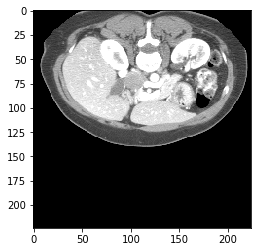

In [77]:
output5, output4, output3, output2, output1 = model.resnet(img24)
plt.imshow(imap(img24)[:,:,1],cmap = 'gray')

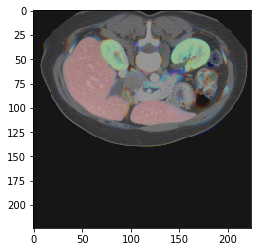

In [78]:
plt.imshow(0.5*imap(img24)[:,:,:]/255 + 0.5*pmap(F.softmax(output6, dim=1)))

In [61]:
output6 = model(img24)

def pmap(output):
    #output = F.softmax(output,dim=1)
    # output = torch.sigmoid(output)
    output = output.cpu().data.numpy()
    
    out = np.squeeze(output)
    out = out[1:]
    out = out.transpose(2,1,0)
    # out[out>1] = 1
    # out[out<0] = 0
    # fi_out = (out - out.min()) / (out.max() - out.min())
    #out = out.astype(np.uint8)
    return out
def attmap(output):
    w_map = model.att(output)
    w_map = w_map.cpu().data.numpy()
    w_map = np.squeeze(w_map)
    print(w_map.shape)
    w_map = w_map.transpose(1,0)
    #w_map = w_map.astype(np.uint8)
    return w_map
def imap(img):
    img = img.cpu().data.numpy()
    img = np.squeeze(img)
    img = img.transpose(2,1,0)
    img = (img + 200) / 400 * 255
    return img

In [27]:
def att_weight(out):
    w = model.att(out)
    w = model.gapool1(w) + model.gapool2(w)
    return w

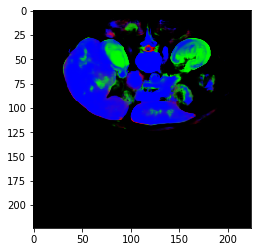

In [79]:
plt.imshow(pmap(F.softmax(output1, dim=1)))

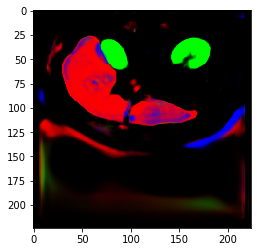

In [63]:
plt.imshow(pmap(F.softmax(output2, dim=1)))

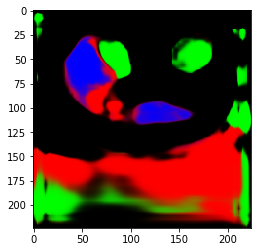

In [64]:
plt.imshow(pmap(F.softmax(output3, dim=1)))

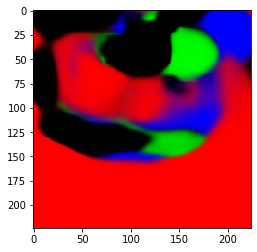

In [65]:
plt.imshow(pmap(F.softmax(output4, dim=1)))

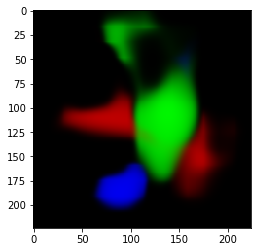

In [66]:
plt.imshow(pmap(F.softmax(output5, dim=1)))

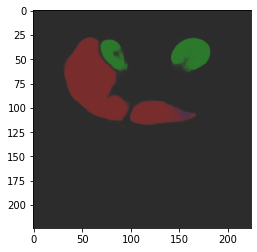

In [67]:
plt.imshow(pmap(F.softmax(output6, dim=1)))

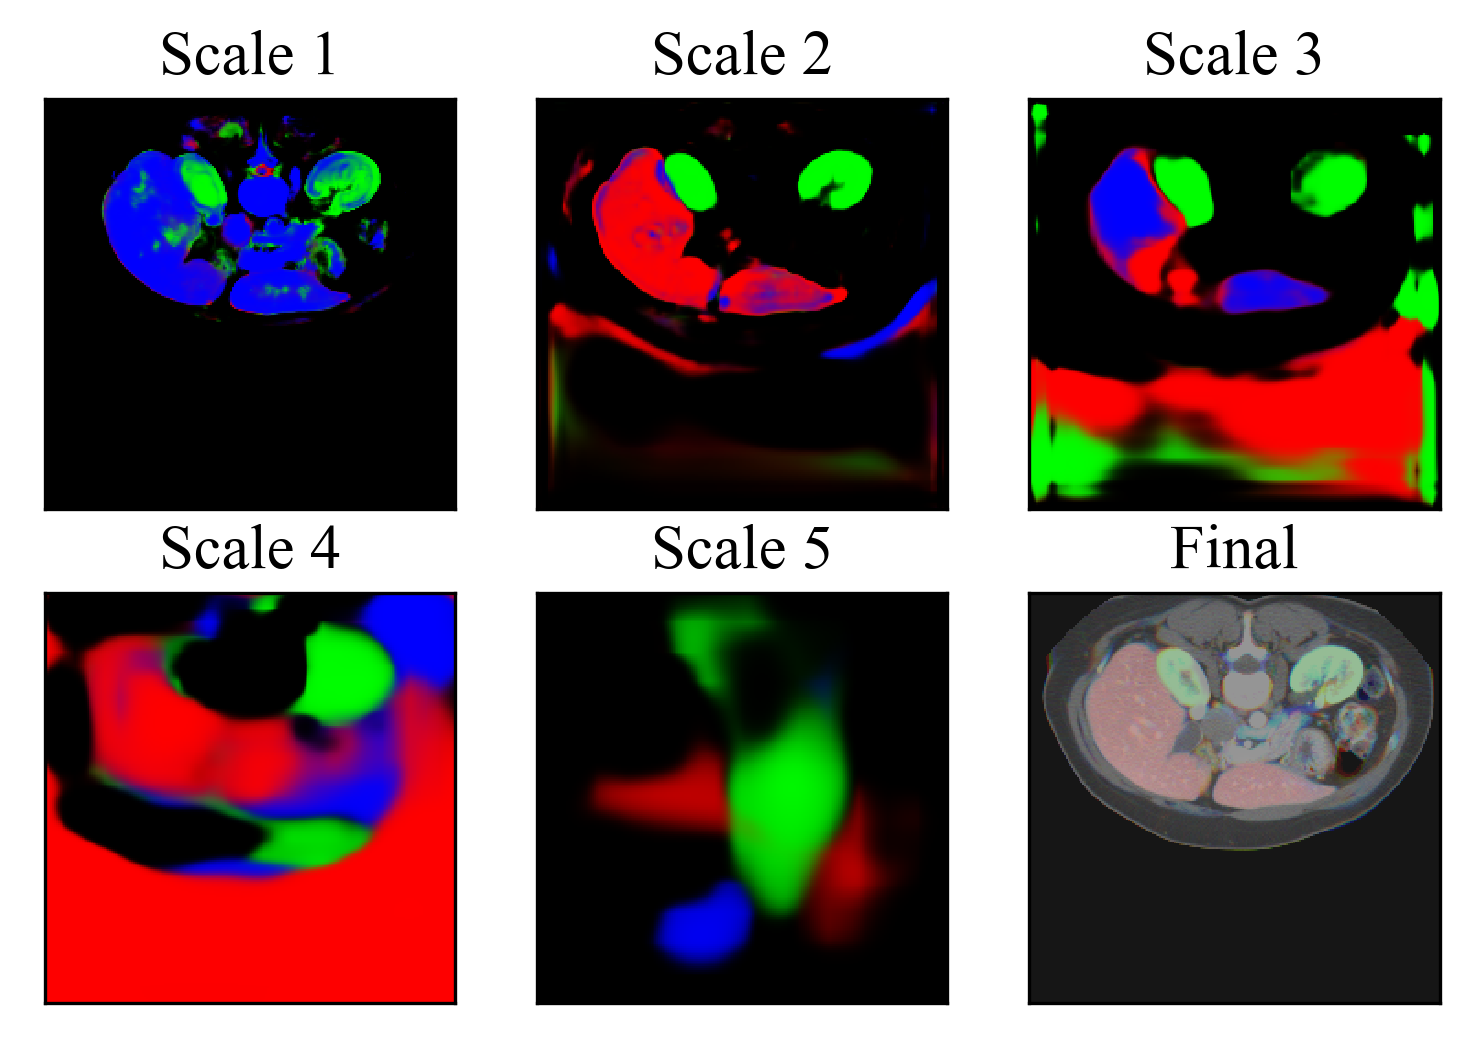

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

csfont = {'fontname':'Times New Roman'}

# Image1 = output1[0,1:].detach().numpy()
# Image1 = np.transpose(Image1, (2,1,0))

fig, axs = plt.subplots(2,3, dpi=300)

axs[0,0].imshow(pmap(F.softmax(output1, dim=1)))

axs[0,0].set_xticklabels([])
axs[0,0].set_yticklabels([])
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
axs[0,0].set_title('Scale 1', **csfont, fontsize=15)

axs[0,1].imshow(pmap(F.softmax(output2, dim=1)))

axs[0,1].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,1].get_xaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)

axs[0,1].set_title('Scale 2', **csfont, fontsize=15)

axs[0,2].imshow(pmap(F.softmax(output3, dim=1)))

axs[0,2].set_xticklabels([])
axs[0,2].set_yticklabels([])
axs[0,2].get_xaxis().set_visible(False)
axs[0,2].get_yaxis().set_visible(False)

axs[0,2].set_title('Scale 3', **csfont, fontsize=15)

axs[1,0].imshow(pmap(F.softmax(output4, dim=1)))

axs[1,0].set_xticklabels([])
axs[1,0].set_yticklabels([])
axs[1,0].get_xaxis().set_visible(False)
axs[1,0].get_yaxis().set_visible(False)

axs[1,0].set_title('Scale 4', **csfont, fontsize=15)

axs[1,1].imshow(pmap(F.softmax(output5, dim=1)))

axs[1,1].set_xticklabels([])
axs[1,1].set_yticklabels([])
axs[1,1].get_xaxis().set_visible(False)
axs[1,1].get_yaxis().set_visible(False)

axs[1,1].set_title('Scale 5', **csfont, fontsize=15)

axs[1,2].imshow(0.5*imap(img24)[:,:,:]/255 + 0.5*pmap(F.softmax(output6, dim=1)))

axs[1,2].set_xticklabels([])
axs[1,2].set_yticklabels([])
axs[1,2].get_xaxis().set_visible(False)
axs[1,2].get_yaxis().set_visible(False)
axs[1,2].set_title('Final', **csfont, fontsize=15)

plt.savefig('Xi.png')